In [24]:
import numpy as np
import pandas as pd

### Preprocess, EDA and Feature Selection

In [25]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [26]:
df.shape

(100, 4)

In [27]:
df.size

400

In [28]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [30]:
df=df.iloc[:,1:]

In [31]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [32]:
import matplotlib.pyplot as plt

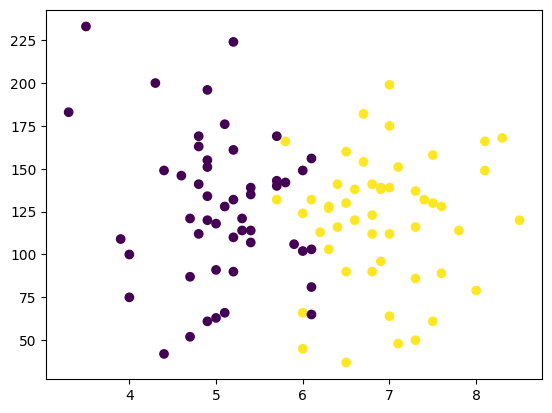

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

### Extact Input and Output Columns

In [34]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [35]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [36]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


### Train test split & Scaling the values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [38]:
X_train

,cgpa,iq
75,4.8,169.0
4,5.8,142.0
94,4.7,52.0
58,8.0,79.0
33,6.0,149.0
...,...,...
70,6.3,127.0
5,7.1,48.0
63,6.3,128.0
8,6.1,156.0


In [39]:
X_test

,cgpa,iq
31,3.9,109.0
15,5.1,176.0
74,6.7,154.0
68,4.0,75.0
10,6.0,45.0
57,6.5,130.0
82,6.5,37.0
25,5.0,91.0
85,5.8,166.0
80,4.9,196.0


In [40]:
y_train

,placement
75,0
4,0
94,0
58,1
33,0
...,...
70,1
5,1
63,1
8,0


In [41]:
y_test

,placement
31,0
15,0
74,1
68,0
10,1
57,1
82,1
25,0
85,1
80,0


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
X_train=scaler.fit_transform(X_train)

In [46]:
X_test=scaler.transform(X_test)

In [47]:
X_train

array([[-1.09928412,  1.17911329],
       [-0.22141748,  0.46831069],
       [-1.18707079, -1.90103133],
       [ 1.70988914, -1.19022872],
       [-0.04584415,  0.65259284],
       [-0.30920414,  0.41565864],
       [ 1.09538249, -0.21616589],
       [-0.57256413, -0.26881794],
       [ 0.04194252, -0.55840419],
       [ 1.27095582, -1.66409713],
       [ 1.79767581,  1.10013522],
       [-0.30920414,  0.20505046],
       [ 2.14882247, -0.11086181],
       [ 0.91980916,  0.70524489],
       [-1.09928412,  0.44198466],
       [ 0.39308918, -0.90064248],
       [ 0.12972918, -0.29514396],
       [ 0.8320225 , -0.32146998],
       [ 0.04194252, -1.13757668],
       [-0.74813746,  0.96850511],
       [-1.09928412, -0.32146998],
       [-1.01149746,  0.81054898],
       [-0.74813746, -0.90064248],
       [-1.01149746, -1.66409713],
       [-0.57256413, -0.4531001 ],
       [-1.01149746,  0.70524489],
       [-1.01149746, -0.11086181],
       [ 0.65644917,  0.44198466],
       [ 0.8320225 ,

In [48]:
X_test

array([[-1.8893641 , -0.40044805],
       [-0.83592413,  1.36339545],
       [ 0.56866251,  0.78422296],
       [-1.80157744, -1.29553281],
       [-0.04584415, -2.08531348],
       [ 0.39308918,  0.15239842],
       [ 0.39308918, -2.29592166],
       [-0.92371079, -0.87431645],
       [-0.22141748,  1.10013522],
       [-1.01149746,  1.8899159 ]])

### Train and evaluate the model

In [49]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [50]:
clf.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [56]:
y_test

,placement
31,0
15,0
74,1
68,0
10,1
57,1
82,1
25,0
85,1
80,0


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

<Axes: >

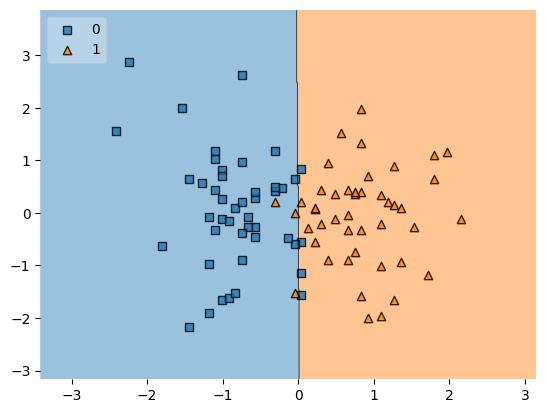

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [57]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))